# Value iteration on gridworld
This notebook shows how to use value iteration on the gridworld environment

In [1]:
# Set relative path to parent directory
import sys, os
sys.path.insert(0, os.path.abspath('..'))

In [2]:
# Import and set up environment
from environments.gridWorld import gridWorld
env = gridWorld('../environments/gridworlds/tiny.json')

## Value iteration algorithm

In [3]:
import copy
import numpy as np

def value_iteration(mdp, epsilon, gamma):
    V = dict()
    delta_lst = []
    # Initialize utilities to zero
    for s in env.states():
        V.update({s: 0.0})
    while(True):
        V_prev = copy.deepcopy(V)
        delta = 0
        for s in mdp.states():
            lst = []
            for a in mdp.actions(s):
                value_sum = 0
                for s_next in mdp.states():
                    value_sum += mdp.transition_probability(s_next, s, a)*V_prev[s_next]
                lst.append(value_sum)
            V[s] = mdp.reward(s) + (0 if (lst == []) else gamma*np.max(lst))
            if np.abs(V[s] - V_prev[s]) > delta:
                delta = np.abs(V[s] - V_prev[s])
        delta_lst.append(delta)
        if delta < epsilon*(1 - gamma)/gamma or (gamma == 1 and delta  < epsilon):
            return V, delta_lst

## Finding the policy given the value function

In [4]:
def policy(mdp, V):
    PI = dict()
    for s in mdp.states():
        a_lst = []
        v_lst = []
        for a in mdp.actions(s):
            value_sum = 0
            for s_next in mdp.states():
                value_sum += mdp.transition_probability(s_next, s, a)*V[s_next]
            v_lst.append(value_sum)
            a_lst.append(a)
        if len(a_lst) > 0:
            PI.update({s: a_lst[np.argmax(v_lst)]})
    return PI

## Calling the function
We now call the value itteration function and the policy finding function and visualize optimal the value function and policy

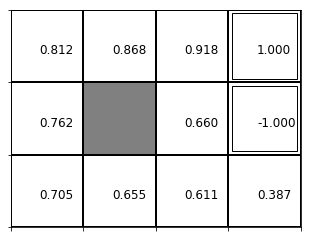

In [5]:
from matplotlib import pyplot as plt

V, delta = value_iteration(env, 1e-3, 1)
fig = env.render(show = False, show_state = False, show_reward = False)            

for s in V.keys():
    fig.axes[0].annotate("{0:.3f}".format(V[s]), (s[1] - 0.1, s[0] + 0.1), size = 12)

plt.show()

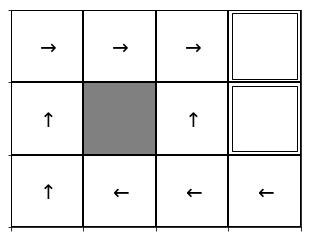

In [6]:
PI = policy(env, V)

fig = env.render(show = False, show_state = False, show_reward = False)

action_map = {"U": "↑", "D": "↓", "L": "←", "R": "→"}

for s in PI.keys():
        fig.axes[0].annotate(action_map[PI[s]], (s[1] - 0.1, s[0] + 0.1), size = 20)

plt.show()

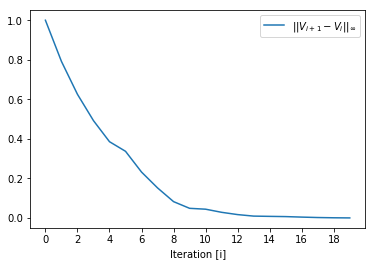

In [35]:
# The loss in the value function from one iteration to the next
plt.plot(delta)
plt.legend(["$||V_{i+1} - V_{i}||_{\infty}$"])
plt.xlabel("Iteration [i]")
plt.xticks(range(0, len(delta), 2))
#plt.yscale("log", nonposy='clip')
plt.show()

In [20]:
plt.show()